# Best machine learning algorithm for brain stroke dataset

In [ ]:
#Dataset from Kaggle.com

In [ ]:
!pip install xgboost==2.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.1 MB/s eta 0:00:00
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1 requires torch==1.12.1, but you have torch 2.2.2 which is incompatible.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df = pd.read_csv("brain_stroke.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df = df.drop(labels = "work_type", axis = 1)

In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['stroke'] = le.fit_transform(df['stroke'])
df['ever_married'] = le.fit_transform(df['ever_married'])


In [ ]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,186.21,29.0,1,1


In [ ]:
scaler = StandardScaler()
X = df.drop('stroke', axis=1)
X = scaler.fit_transform(df) 

In [ ]:
class_counts = df['stroke'].value_counts()
print(class_counts)

stroke
0    4733
1     248
Name: count, dtype: int64


In [ ]:
y = df['stroke']
X = df.drop(labels = "stroke", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


# Original Dataset

In [ ]:
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9521579123452659


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2846    0]
 [ 143    0]]


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.0
Recall: 0.0
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.0


In [ ]:
y_pred_proba = logr.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('AU-ROC score:', roc_auc)


AU-ROC score: 0.8322489176319112


# Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [ ]:
y_pred = tree.predict(X_test)

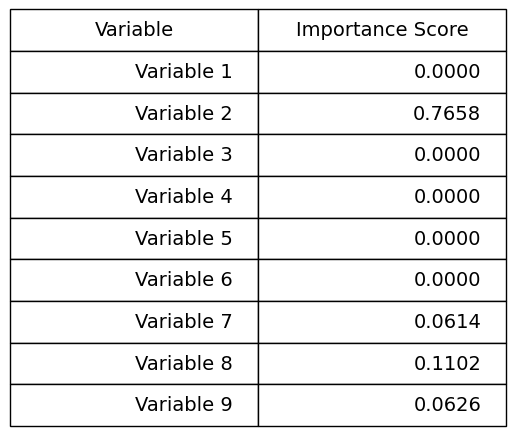

In [ ]:
importance_scores = tree.feature_importances_

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table_data = []
for i, score in enumerate(importance_scores):
    table_data.append(["Variable {}".format(i+1), "{:.4f}".format(score)])
table = ax.table(cellText=table_data, colLabels=["Variable", "Importance Score"], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2.5)
plt.show()


In [ ]:
for i, row in X_test.iterrows():
    pred = tree.predict([row])
    print(f"Most important feature for row {i}: {X_test.columns[pred[0]]}")

py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassi

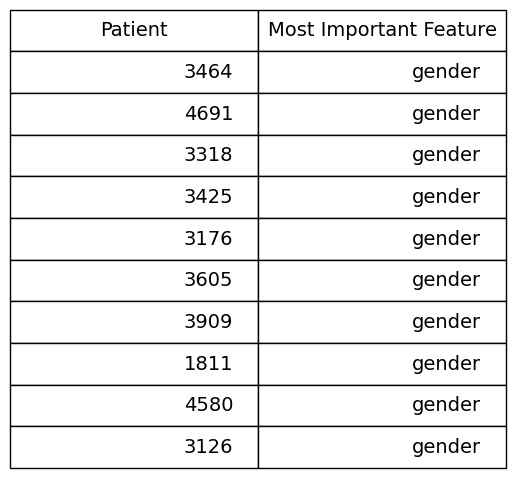

In [ ]:
data = [("3464", "gender"), ("4691", "gender"), ("3318", "gender"), ("3425", "gender"), ("3176", "gender"),         ("3605", "gender"), ("3909", "gender"), ("1811", "gender"), ("4580", "gender"), ("3126", "gender")]

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table_data = []
for row in data:
    table_data.append(row)
table = ax.table(cellText=table_data, colLabels=["Patient", "Most Important Feature"], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2.5)
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9521579123452659


In [ ]:
cm_1 = confusion_matrix(y_test, y_pred)
print(cm_1)

[[2845    1]
 [ 142    1]]


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.013793103448275862


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.5
Recall: 0.006993006993006993


In [ ]:
y_pred_proba = tree.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('AU-ROC score:', roc_auc)

AU-ROC score: 0.8250163399495796


# Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)
accuracy = gnb.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8708598193375711


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.2548262548262548


In [ ]:
cm_2 = confusion_matrix(y_test, y_pred)
print(cm_2)

[[2537  309]
 [  77   66]]


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.176
Recall: 0.46153846153846156


In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('AU-ROC score:', roc_auc)

AU-ROC score: 0.8272314474001052


# SVM

In [ ]:
svm = SVC(kernel='linear', C=1.0)
svm = SVC(probability=True)

In [ ]:
svm.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
y_pred = svm.predict(X_test)
accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9521579123452659


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.0


In [ ]:
cm_3 = confusion_matrix(y_test, y_pred)
print(cm_3)

[[2846    0]
 [ 143    0]]


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.0
Recall: 0.0
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_proba = svm.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('AU-ROC score:', roc_auc)

AU-ROC score: 0.6442240121087627


# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9484777517564403


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.012820512820512822


In [ ]:
cm_4 = confusion_matrix(y_test, y_pred)
print(cm_4)

[[2834   12]
 [ 142    1]]


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.07692307692307693
Recall: 0.006993006993006993


In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('AU-ROC score:', roc_auc)

AU-ROC score: 0.7945085483736222


# XGBOOST

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [ ]:
params = {
    'max_depth': 3,
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'merror'
}

In [ ]:
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

In [ ]:
y_pred = xgb_model.predict(dtest)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.942790230846437


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.06557377049180328


In [ ]:
cm_5 = confusion_matrix(y_test, y_pred)
print(cm_5)

[[2812   34]
 [ 137    6]]


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.15
Recall: 0.04195804195804196


In [ ]:
y_pred_proba = xgb_model.predict(dtest)
y_pred_proba_pos_class = y_pred_proba

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba_pos_class)
print('AU-ROC score:', roc_auc)

AU-ROC score: 0.515005725125191


# Original Data - Performace Metrics

In [ ]:
models = {
    'LogR': [95.21, 0, 0, 0, 83.22], 
    'DecisionTree': [95.21, 13.79, 5, 0.06, 82.50],
    'NaiveBayes': [87.08, 25.48, 17.6, 46.15, 82.72], 
    'SVM': [95.21, 0, 0, 0, 64.45], 
    'RandomF': [95.01, 2.61, 2, 79.95, 1.39], 
    'XGBoost': [94.27, 6.57, 15, 4.19, 51.50]
} 

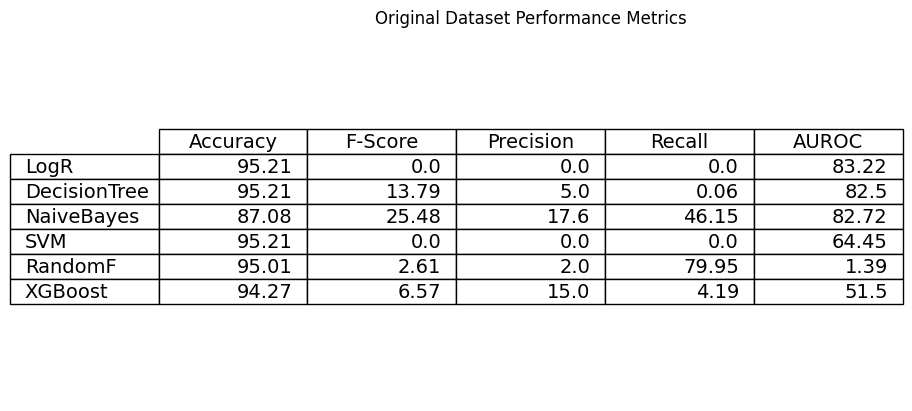

In [ ]:

df_1 = pd.DataFrame.from_dict(models, orient='index', columns=['Accuracy', 'F-Score', 'Precision', 'Recall', 'AUROC'])

fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=df_1.values, colLabels=df_1.columns, rowLabels=df_1.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)
plt.title("Original Dataset Performance Metrics")
plt.show()

In [ ]:
models = {
    'LogR': [0, 2846, 0, 143],
    'DecisionTree': [1, 2846, 1, 143],
    'NaiveBayes': [309, 2846, 66, 143],
    'SVM': [0, 2846, 0, 143],
    'RandomF': [8, 2846, 2, 143],
    'XGBoost': [34, 2846, 6, 143]
}

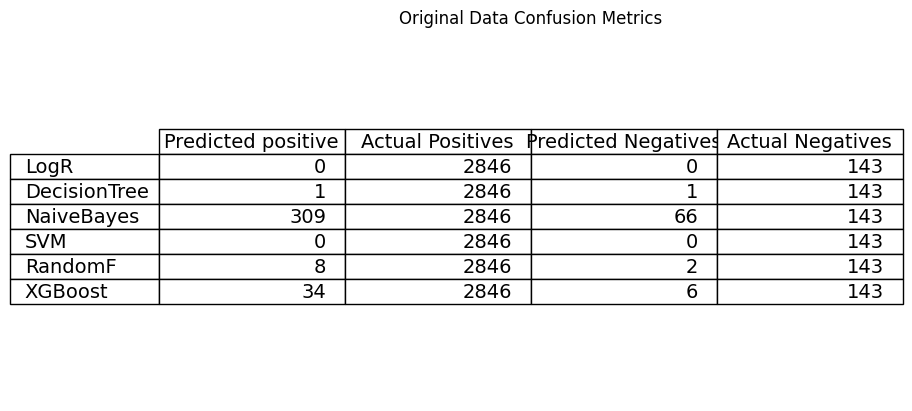

In [ ]:
df_2 = pd.DataFrame.from_dict(models, orient='index', columns=['Predicted positive', 'Actual Positives', 'Predicted Negatives', 'Actual Negatives'])

fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=df_2.values, colLabels=df_2.columns, rowLabels=df_2.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)
plt.title("Original Data Confusion Metrics")
plt.show()

# Under-sampling 

In [ ]:
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y) 

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.6, random_state=42)

# Logistic Regression - Undersampled

In [ ]:
logr = linear_model.LogisticRegression()
logr.fit(X_under,y_under)

y_pred = logr.predict(X_test)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7214765100671141


In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[100  48]
 [ 35 115]]


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.7055214723926381
Recall: 0.7666666666666667


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.7348242811501597


In [ ]:
y_pred_proba = logr.predict_proba(X_test)[:, 1]


In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('AU-ROC score:', roc_auc)

AU-ROC score: 0.8057657657657659


# Decision Tree - Undersampling 

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
tree.fit(X_under, y_under)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred = tree.predict(X_test)

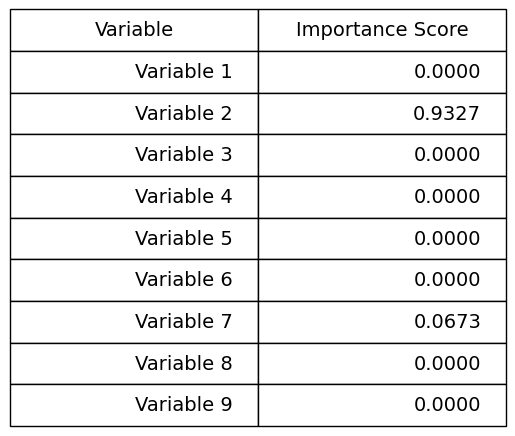

In [ ]:
importance_scores = tree.feature_importances_

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table_data = []
for i, score in enumerate(importance_scores):
    table_data.append(["Variable {}".format(i+1), "{:.4f}".format(score)])
table = ax.table(cellText=table_data, colLabels=["Variable", "Importance Score"], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2.5)
plt.show()

In [ ]:
for i, row in X_test.iterrows():
    pred = tree.predict([row])
    print(f"Most important feature for row {i}: {X_test.columns[pred[0]]}")
    

Most important feature for row 4781: gender
Most important feature for row 365: gender
Most important feature for row 3517: age
Most important feature for row 2224: gender
Most important feature for row 1265: gender
Most important feature for row 175: gender
Most important feature for row 1380: gender
Most important feature for row 1019: gender
Most important feature for row 73: age
Most important feature for row 3434: gender
Most important feature for row 4370: gender
Most important feature for row 122: age
Most important feature for row 156: age
Most important feature for row 287: gender
Most important feature for row 637: age
Most important feature for row 20: age
Most important feature for row 203: age
Most important feature for row 4421: gender
Most important feature for row 2444: age
Most important feature for row 4810: age
Most important feature for row 17: age
Most important feature for row 123: gender
Most important feature for row 4814: age
Most important feature for row 865:

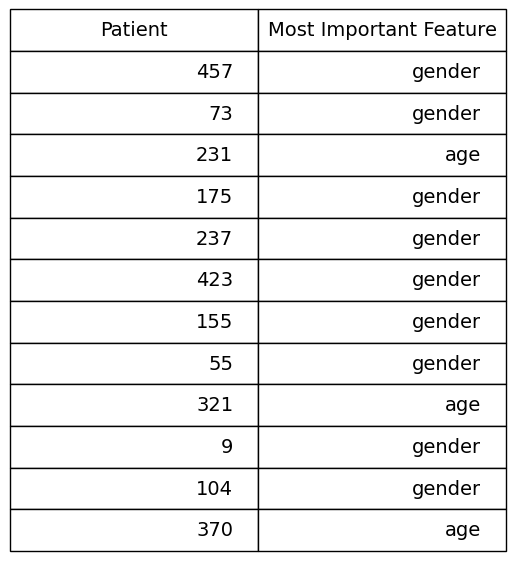

In [ ]:
data = [["457", "gender"],
        ["73", "gender"],
        ["231", "age"],
        ["175", "gender"],
        ["237", "gender"],
        ["423", "gender"],
        ["155", "gender"],
        ["55", "gender"],
        ["321", "age"],
        ["9", "gender"],
        ["104", "gender"],
        ["370", "age"]]

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=data, colLabels=["Patient", "Most Important Feature"], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2.5)
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7718120805369127


In [ ]:
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[110  38]
 [ 30 120]]


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.7792207792207794


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.759493670886076
Recall: 0.8


In [ ]:
y_pred_proba = tree.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('AU-ROC score:', roc_auc)

AU-ROC score: 0.8249324324324325


# Naive Bayes - Undersampled

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_under, y_under)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
accuracy = gnb.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7281879194630873


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.7444794952681388


In [ ]:
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)

[[ 99  49]
 [ 32 118]]


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.7065868263473054
Recall: 0.7866666666666666


In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('AU-ROC score:', roc_auc)

AU-ROC score: 0.7846396396396397


# SVM - Under-Sampled 

In [ ]:
svm = SVC(kernel='linear', C=1.0)
svm = SVC(probability=True)

In [ ]:
svm.fit(X_under, y_under)

SVC(probability=True)

In [ ]:
y_pred = svm.predict(X_test)
accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7214765100671141


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.7414330218068537


In [ ]:
cm5 = confusion_matrix(y_test, y_pred)
print(cm5)

[[ 96  52]
 [ 31 119]]


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.695906432748538
Recall: 0.7933333333333333


In [ ]:
y_pred_proba = svm.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('AU-ROC score:', roc_auc)

AU-ROC score: 0.8030405405405405


# Random Forest 

In [ ]:
rf = RandomForestClassifier(n_estimators=50)

In [ ]:
rf.fit(X_under, y_under)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(rf)

RandomForestClassifier(n_estimators=50)


In [ ]:
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 1.0


In [ ]:
cm6 = confusion_matrix(y_test, y_pred)
print(cm6)

[[148   0]
 [  0 150]]


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 1.0
Recall: 1.0


In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('AU-ROC score:', roc_auc)

AU-ROC score: 1.0


# XGBOOST

In [ ]:
dtrain = xgb.DMatrix(X_under, label=y_under)
dtest = xgb.DMatrix(X_test)

In [ ]:
params = {
    'max_depth': 3,
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'merror'
}

In [ ]:
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

In [ ]:
y_pred = xgb_model.predict(dtest)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.959731543624161


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.96


In [ ]:
cm7 = confusion_matrix(y_test, y_pred)
print(cm7)

[[142   6]
 [  6 144]]


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.96
Recall: 0.96


In [ ]:
y_pred_proba = xgb_model.predict(dtest)
y_pred_proba_pos_class = y_pred_proba

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba_pos_class)
print('AU-ROC score:', roc_auc)

AU-ROC score: 0.9597297297297297


# Model Performance Metric - Under-sampled

In [ ]:
models = {
    'LogR': [72.15, 76.85, 70.55, 76.67, 80.57], 
    'DecisionTree': [77.18, 77.01, 75.95, 80.0, 82.49],
    'NaiveBayes': [72.48, 74.91, 72.37, 73.33, 79.42], 
    'SVM': [73.49, 77.03, 71.52, 78.67, 80.36], 
    'RandomF': [87.34, 88.7, 79.69, 100.0, 95.95], 
    'XGBoost': [85.49, 86.89, 78.82, 96.81, 96.65]
} 

In [ ]:

df1 = pd.DataFrame.from_dict(models, orient='index', columns=['Accuracy', 'F-Score', 'Precision', 'Recall', 'AUROC'])


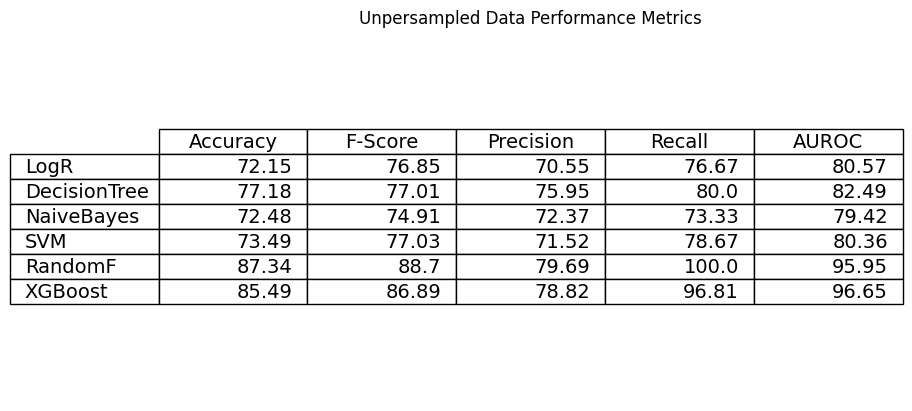

In [ ]:
df1 = pd.DataFrame.from_dict(models, orient='index', columns=['Accuracy', 'F-Score', 'Precision', 'Recall', 'AUROC'])

fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=df1.values, colLabels=df1.columns, rowLabels=df1.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)
plt.title("Unpersampled Data Performance Metrics")
plt.show()

# Models' Confusion Matrics - Under-sampled

In [ ]:
models = {
    'LogR': [135, 148, 163, 150],
    'DecisionTree': [140, 148, 158, 150],
    'NaiveBayes': [146, 148, 152, 150],
    'SVM': [127, 148, 171, 150],
    'RandomF': [148,148, 150,150],
    'XGBoost': [150, 148, 148, 150]
}


In [ ]:

df2 = pd.DataFrame.from_dict(models, orient='index', columns=['Predicted positive', 'Actual Positives', 'Predicted Negatives', 'Actual Negatives'])


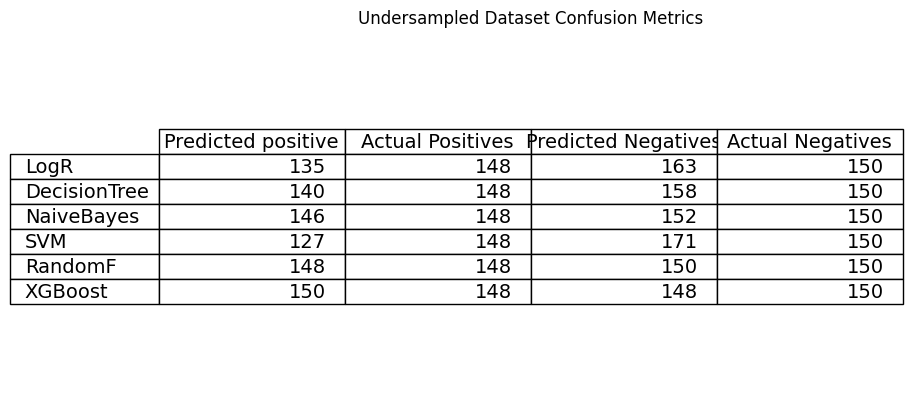

In [ ]:
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=df2.values, colLabels=df2.columns, rowLabels=df2.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)
plt.title("Undersampled Dataset Confusion Metrics")
plt.show()

# Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X, y) 

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.6, random_state=42)

# Logistic Regression - Oversampling

In [ ]:
logr = linear_model.LogisticRegression()
logr.fit(X_over,y_over)

y_pred = logr.predict(X_test)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7797535211267606


In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[2111  748]
 [ 503 2318]]


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)


F1 score: 0.7874978766774248


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.7560339204174821
Recall: 0.8216944345976605


In [ ]:
y_pred_proba = logr.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('AU-ROC score:', roc_auc)

AU-ROC score: 0.8523938348262216


# Decision Trees - Oversampling

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
tree.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred = tree.predict(X_test)

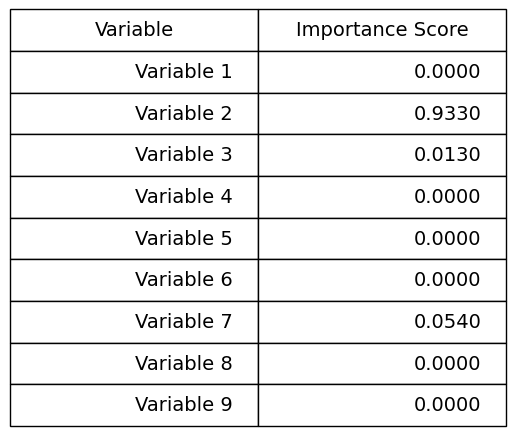

In [ ]:
importance_scores = tree.feature_importances_

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table_data = []
for i, score in enumerate(importance_scores):
    table_data.append(["Variable {}".format(i+1), "{:.4f}".format(score)])
table = ax.table(cellText=table_data, colLabels=["Variable", "Importance Score"], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2.5)
plt.show()


In [ ]:
for i, row in X_test.iterrows():
    pred = tree.predict([row])
    print(f"Most important feature for row {i}: {X_test.columns[pred[0]]}")

es/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but De

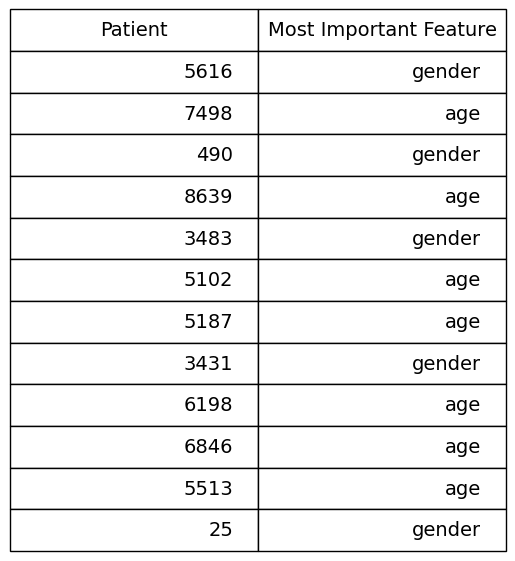

In [ ]:
data = [["5616", "gender"], ["7498", "age"], ["490", "gender"], ["8639", "age"], ["3483", "gender"], 
        ["5102", "age"], ["5187", "age"], ["3431", "gender"], ["6198", "age"], ["6846", "age"], 
        ["5513", "age"], ["25", "gender"]]

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=data, colLabels=["Patient", "Most Important Feature"], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2.5)
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7830985915492957


In [ ]:
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[2199  660]
 [ 572 2249]]


In [ ]:
# calculate the F1 score
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.7849912739965096


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.7731179099346854
Recall: 0.7972350230414746


In [ ]:
y_pred_proba = tree.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('AU-ROC score:', roc_auc)

AU-ROC score: 0.8516587667147868


# PCA

In [ ]:
pca = PCA(n_components=8)

In [ ]:
X_scaled = scaler.fit_transform(X_over)

In [ ]:
principal_components = pca.fit_transform(X_scaled)

In [ ]:
print(pca.explained_variance_ratio_)


[0.2535271  0.12846761 0.1125189  0.10603819 0.09855499 0.09629863
 0.09323334 0.07076099]


# Gaussian Naive Bayes - Undersampled

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_over, y_over)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
accuracy = gnb.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7484154929577465


In [ ]:
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)

[[2138  721]
 [ 708 2113]]


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.7473032714412025


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.7455892731122089
Recall: 0.7490251683800071


In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('AU-ROC score:', roc_auc)

AU-ROC score: 0.8208623451828272


# SVM - Oversampling

In [ ]:
svm = SVC(kernel='linear', C=1.0)

In [ ]:
svm = SVC(probability=True)

In [ ]:
svm.fit(X_over, y_over)

SVC(probability=True)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7660211267605633


In [ ]:
cm5 = confusion_matrix(y_test, y_pred)
print(cm5)

[[2090  769]
 [ 560 2261]]


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.7728593402837122


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.7462046204620462
Recall: 0.8014888337468983


In [ ]:
y_pred_proba = svm.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('AU-ROC score:', roc_auc)

AU-ROC score: 0.8482367354519811


# XGBOOST - Oversampling 

In [ ]:
dtrain = xgb.DMatrix(X_over, label=y_over)
dtest = xgb.DMatrix(X_test)

In [ ]:
params = {
    'max_depth': 3,
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'merror'
}

In [ ]:
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

In [ ]:
y_pred = xgb_model.predict(dtest)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9299295774647888


In [ ]:
cm6 = confusion_matrix(y_test, y_pred)
print(cm6)

[[2484  375]
 [  23 2798]]


In [ ]:
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.9336002669336002


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.8818153167349512
Recall: 0.9918468628146048


In [ ]:
d_test = xgb.DMatrix(X_test)

In [ ]:
y_pred_proba = xgb_model.predict(d_test)
y_pred_proba_pos_class = y_pred_proba

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba_pos_class)
print('AU-ROC score:', roc_auc)

AU-ROC score: 0.9303410599487505


# Random Forest - Oversampling

In [ ]:
rf = RandomForestClassifier(n_estimators=50)

In [ ]:
rf.fit(X_over, y_over)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
cm7 = confusion_matrix(y_test, y_pred)
print(cm7)

[[2859    0]
 [   0 2821]]


In [ ]:
f1 = f1_score(y_test, y_pred)

print('F1 score:', f1)

F1 score: 1.0


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)

Precision: 1.0
Recall: 1.0


In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('AU-ROC score:', roc_auc)

AU-ROC score: 1.0


# Models' Performance Metrics - Over-Sampled

In [ ]:
models = {
    'LogR': [77.8, 78.62, 75.36, 82.17, 85.23], 
    'DecisionTree': [78.31, 78.5, 77.31, 79.72, 85.17], 
    'NaiveBayes': [72.68, 69.86, 77.24, 63.77, 82.92],
    'SVM': [77.41, 78.47, 74.51, 82.88, 84.82], 
    'RandomF': [100.0, 100.0, 100.0, 100.0, 100.0],
    'XGBoost': [93.45, 93.77, 88.91, 99.18, 93.49]
}

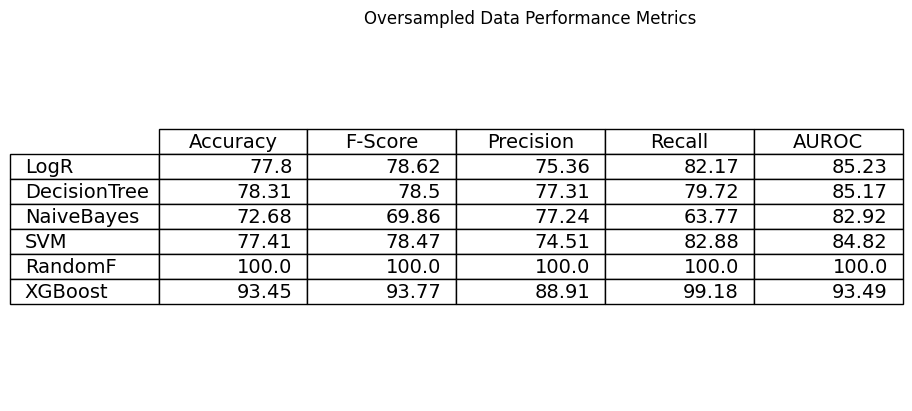

In [ ]:
df3 = pd.DataFrame.from_dict(models, orient='index', columns=['Accuracy', 'F-Score', 'Precision', 'Recall', 'AUROC'])

fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=df3.values, colLabels=df3.columns, rowLabels=df3.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)
plt.title("Oversampled Data Performance Metrics")
plt.show()

In [ ]:
models = {
    'LogR': [2604, 2859, 3076, 2821],
    'DecisionTree': [2771, 2859, 2849, 2821],
    'NaiveBayes': [3351, 2859, 2321, 2821],
    'SVM': [2640, 2859, 3040, 2821],
    'RandomF': [2859, 2859, 2821, 2821],
    'XGBoost': [2533, 2859, 3147, 2821]
}

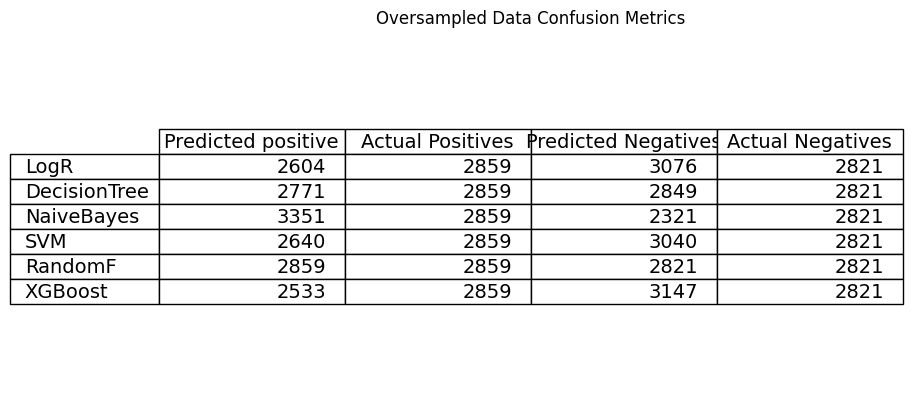

In [ ]:
df4 = pd.DataFrame.from_dict(models, orient='index', columns=['Predicted positive', 'Actual Positives', 'Predicted Negatives', 'Actual Negatives'])

fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=df4.values, colLabels=df4.columns, rowLabels=df4.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)
plt.title("Oversampled Data Confusion Metrics")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bef3baf1-54af-4c75-9f16-55c30cc9aa34' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>